# Default Rate vs Loan Volumes by State

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
file_path = '../../Data/Geographic Analysis/default_rates_vs_loan_volumes.csv'

In [74]:
df = pd.read_csv(file_path)
df

,state,loan_amount,default_rate
0,WALES,"$34,296,400.00",20.873
1,NEW YORK,"$34,309,900.00",20.982
2,QUEBEC,"$34,352,400.00",21.193
3,ENGLAND,"$35,479,675.00",21.812
4,ONTARIO,"$34,320,025.00",21.875
5,TEXAS,"$34,815,750.00",22.228
6,CALIFORNIA,"$34,540,650.00",22.343
7,BC,"$35,279,225.00",22.479
8,SCOTLAND,"$34,982,275.00",22.505


In [75]:
df['loan_amount'] = df['loan_amount'].replace('[\$,]', '', regex=True).astype(float)

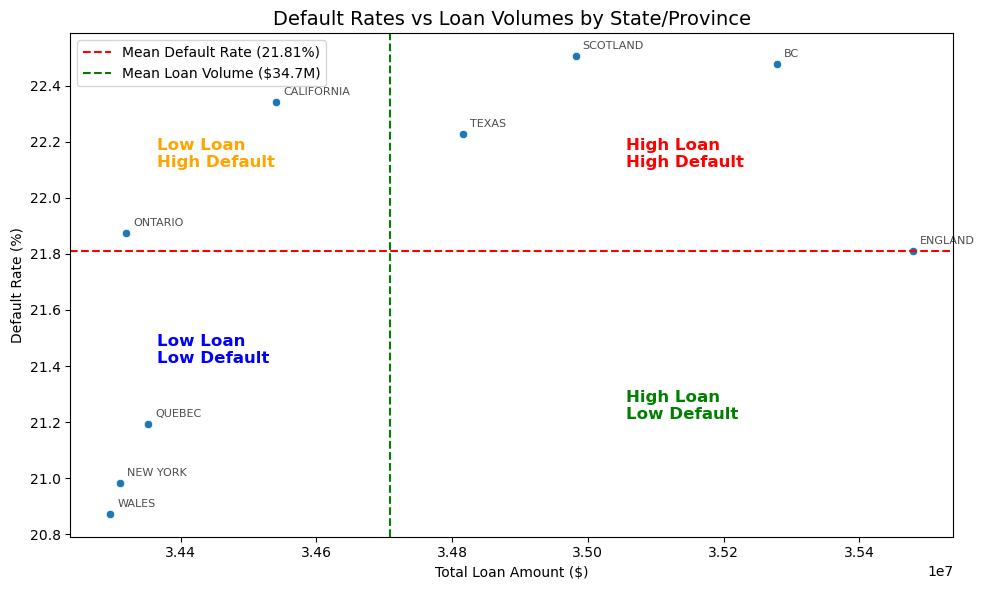

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df, x='loan_amount', y='default_rate', ax=ax)

# Annotate each point with state name
for idx, row in df.iterrows():
    ax.annotate(row['state'], 
                (row['loan_amount'], row['default_rate']),
                fontsize=8,
                alpha=0.7,
                xytext=(5, 5),  # Offset text slightly from point
                textcoords='offset points')

# Calculate means
mean_loan = df['loan_amount'].mean()
mean_default = df['default_rate'].mean()

# Draw segmentation lines
ax.axhline(y=mean_default, color='r', linestyle='--', label=f'Mean Default Rate ({mean_default:.2f}%)')
ax.axvline(x=mean_loan, color='g', linestyle='--', label=f'Mean Loan Volume (${mean_loan/1e6:.1f}M)')

# Set titles and labels
ax.set_title('Default Rates vs Loan Volumes by State/Province', fontsize=14)
ax.set_xlabel('Total Loan Amount ($)')
ax.set_ylabel('Default Rate (%)')

# Add quadrant labels
ax.text(mean_loan * 1.01, mean_default + 0.3, 'High Loan\nHigh Default', color='red', fontsize=12, weight='bold')
ax.text(mean_loan * 1.01, mean_default - 0.6, 'High Loan\nLow Default', color='green', fontsize=12, weight='bold')
ax.text(mean_loan / 1.01, mean_default + 0.3, 'Low Loan\nHigh Default', color='orange', fontsize=12, weight='bold')
ax.text(mean_loan / 1.01, mean_default - 0.4, 'Low Loan\nLow Default', color='blue', fontsize=12, weight='bold')

# Show legend and plot
ax.legend()
plt.tight_layout()
plt.show()

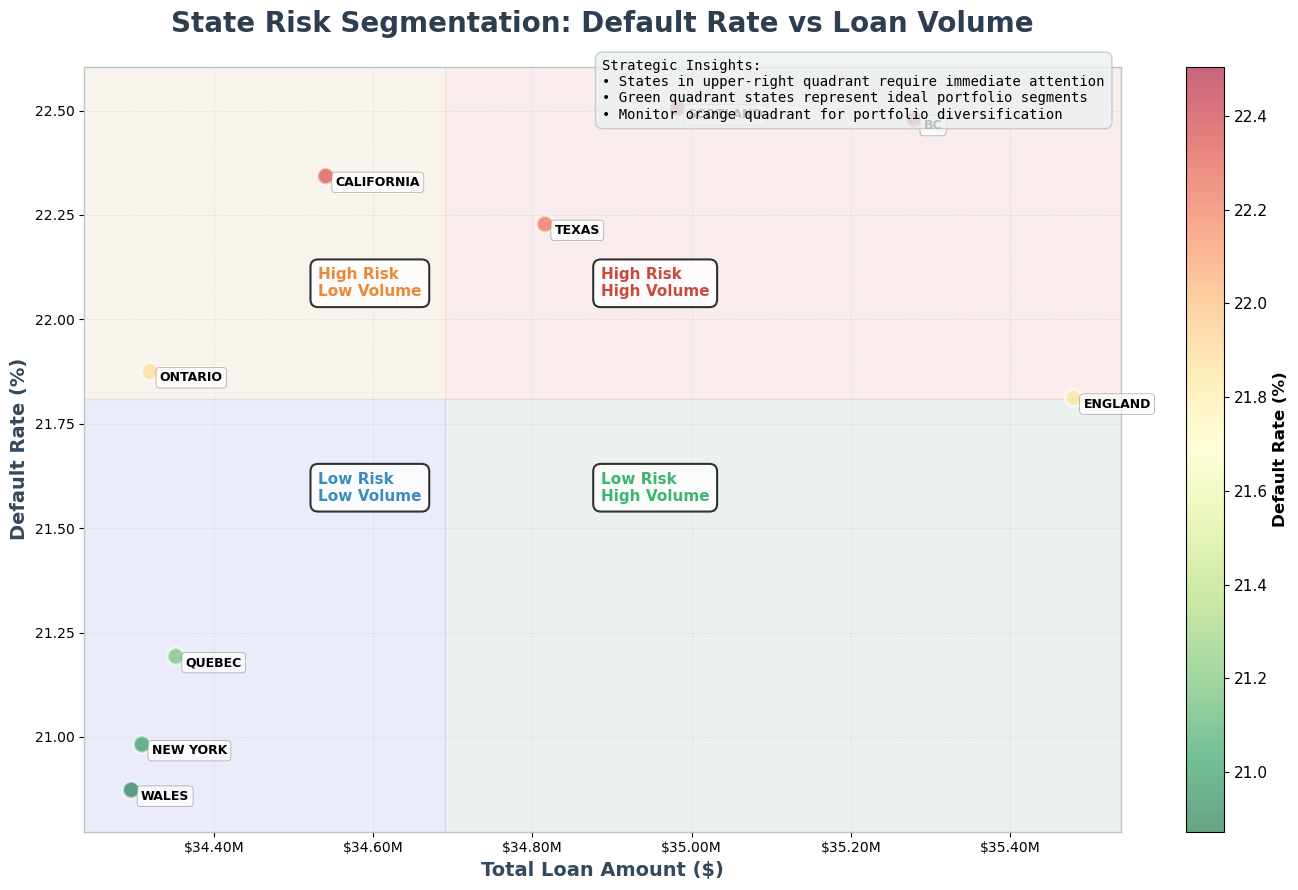

In [ ]:
from matplotlib.ticker import FuncFormatter

# Set up professional styling
plt.style.use('default')

# Create figure
fig, ax = plt.subplots(figsize=(14, 9))

# Calculate means for segmentation
mean_loan = df['loan_amount'].mean()
mean_default = df['default_rate'].mean()

# Create scatter plot with professional styling
scatter = ax.scatter(df['loan_amount'], 
                     df['default_rate'],
                     s=150,  # Larger points
                     alpha=0.6,
                     c=df['default_rate'],
                     cmap='RdYlGn_r',
                     edgecolors='white',
                     linewidth=2)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Default Rate (%)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

# Annotate each point with state name
for idx, row in df.iterrows():
    ax.annotate(row['state'], 
                (row['loan_amount'], row['default_rate']),
                fontsize=9,
                fontweight='bold',
                xytext=(7, -7),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         alpha=0.7,
                         edgecolor='gray',
                         linewidth=0.5))



# Professional title and labels
ax.set_title('State Risk Segmentation: Default Rate vs Loan Volume', 
             fontsize=20, fontweight='bold', pad=25, color='#2c3e50')
ax.set_xlabel('Total Loan Amount ($)', fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylabel('Default Rate (%)', fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylim(df['default_rate'].min(), df['default_rate'].max() + 0.25)

# Format x-axis to show currency in millions
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.2f}M'))

# Add quadrant labels with better positioning and styling
quadrant_style = dict(fontsize=11, weight='bold', alpha=0.9,
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                              alpha=0.8, edgecolor='black', linewidth=1.5))

# Calculate better positions for quadrant labels
x_range = df['loan_amount'].max() - df['loan_amount'].min()
y_range = df['default_rate'].max() - df['default_rate'].min()

ax.text(mean_loan + x_range * 0.15, mean_default + y_range * 0.15, 
        'High Risk\nHigh Volume', color='#c0392b', **quadrant_style)
ax.text(mean_loan + x_range * 0.15, mean_default - y_range * 0.15, 
        'Low Risk\nHigh Volume', color='#27ae60', **quadrant_style)
ax.text(mean_loan - x_range * 0.15, mean_default + y_range * 0.15, 
        'High Risk\nLow Volume', color='#e67e22', **quadrant_style)
ax.text(mean_loan - x_range * 0.15, mean_default - y_range * 0.15, 
        'Low Risk\nLow Volume', color='#2980b9', **quadrant_style)


# Calculate proper xmin/xmax based on actual data range
x_min = df['loan_amount'].min()
x_max = df['loan_amount'].max()
x_mid_norm = (mean_loan - x_min) / (x_max - x_min)

# High default rate quadrants (top half)
ax.axhspan(mean_default, df['default_rate'].max() + 0.25, 
           xmin=0, xmax=x_mid_norm, alpha=0.05, color='orange', zorder=0)
ax.axhspan(mean_default, df['default_rate'].max() + 0.25, 
           xmin=x_mid_norm, xmax=1, alpha=0.05, color='red', zorder=0)

# Low default rate quadrants (bottom half)
ax.axhspan(df['default_rate'].min() - 0.25, mean_default, 
           xmin=0, xmax=x_mid_norm, alpha=0.05, color='blue', zorder=0)
ax.axhspan(df['default_rate'].min() - 0.25, mean_default, 
           xmin=x_mid_norm, xmax=1, alpha=0.05, color='green', zorder=0)

# Professional styling
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_facecolor('#f8f9fa')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('#bdc3c7')

# # Legend with professional styling
# legend = ax.legend(loc='upper left', fontsize=11, framealpha=0.9, 
#                    edgecolor='#bdc3c7', fancybox=True)
# legend.get_frame().set_linewidth(1.5)

# Add key insights box
textstr = '''Strategic Insights:
• States in upper-right quadrant require immediate attention
• Green quadrant states represent ideal portfolio segments
• Monitor orange quadrant for portfolio diversification'''

props = dict(boxstyle='round,pad=0.5', facecolor='#ecf0f1', 
             alpha=0.8, edgecolor='#bdc3c7')
ax.text(0.5, 1.01, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

# Adjust layout
plt.tight_layout()

# Save high-quality image
plt.savefig('state_risk_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

# # Executive Summary
# print("\nExecutive Summary:")
# print(f"Total States Analyzed: {len(df)}")
# print(f"Mean Default Rate: {mean_default:.1f}%")
# print(f"Mean Loan Volume: ${mean_loan/1e6:.1f}M")
# print(f"\nQuadrant Distribution:")
# print(f"• High Risk/High Volume: {len(df[(df['loan_amount'] > mean_loan) & (df['default_rate'] > mean_default)])} states")
# print(f"• Low Risk/High Volume: {len(df[(df['loan_amount'] > mean_loan) & (df['default_rate'] <= mean_default)])} states")
# print(f"• High Risk/Low Volume: {len(df[(df['loan_amount'] <= mean_loan) & (df['default_rate'] > mean_default)])} states")
# print(f"• Low Risk/Low Volume: {len(df[(df['loan_amount'] <= mean_loan) & (df['default_rate'] <= mean_default)])} states")

In [78]:
## Check correlation
import numpy as np
np.corrcoef(df['loan_amount'], df['default_rate'])[0, 1]

## Remove England



np.float64(0.615033840127241)

In [79]:
df_2 = df[df['state'] != 'England']
np.corrcoef(df_2['loan_amount'], df_2['default_rate'])[0, 1]

np.float64(0.615033840127241)

In [80]:
df_2

,state,loan_amount,default_rate
0,WALES,34296400.0,20.873
1,NEW YORK,34309900.0,20.982
2,QUEBEC,34352400.0,21.193
3,ENGLAND,35479675.0,21.812
4,ONTARIO,34320025.0,21.875
5,TEXAS,34815750.0,22.228
6,CALIFORNIA,34540650.0,22.343
7,BC,35279225.0,22.479
8,SCOTLAND,34982275.0,22.505
